In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

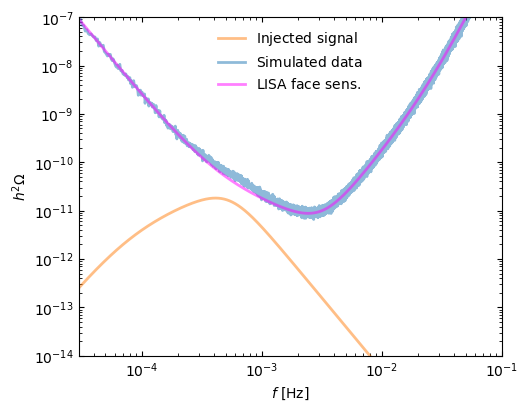

In [2]:
# Read simulation
dfs = pd.read_csv("../data/simulation.csv")

lw = 2

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)

ax.plot(dfs["f0"], dfs["si"], lw=lw, alpha = 0.5, color = 'tab:orange', label=r'$\text{Injected signal}$')

ax.plot(dfs["f0"], dfs["Db"], lw=lw, alpha = 0.5, color = 'tab:blue', label=r'$\text{Simulated data}$')

ax.plot(dfs["f0"], dfs["se"], lw=lw, alpha = 0.5, color='magenta', label=r'$\text{LISA face sens.}$')

ax.set_xscale("log")
ax.set_xlabel(r'$f~\mathrm{[Hz]}$')
ax.set_xlim(3e-5, 1e-1)
ax.tick_params(axis='x', direction='in', which='both', top=True)

ax.set_yscale("log")
ax.set_ylabel(r'$h^2 \Omega$')
ax.set_ylim(1e-14, 1e-7)
ax.tick_params(axis='y', direction='in', which='both', right=True)

ax.legend(loc="upper center", ncol=1,frameon=False)
ax.set_box_aspect(0.8)
plt.show()


In [3]:
# Import data log binning
f = pd.read_csv("../data/frequencies_var.csv")

# Data with stronger bounds
df = pd.read_csv("../data/samples_Tfree_var.csv")

In [4]:
freq = f['f  '].to_numpy()
S = [c for c in df.columns if str(c).startswith("S")] # spectrum entries in each bin
signal = df[S].to_numpy()

In [5]:
# Import data binning as in Ref 1906.09244
fb = pd.read_csv("../data/frequencies_bin.csv")

# Data with stronger bounds
dfb = pd.read_csv("../data/samples_Tfree_bin.csv")

In [6]:
freqb = fb['f  '].to_numpy()
Sb = [c for c in dfb.columns if str(c).startswith("S")] # spectrum entries in each bin
signalb = dfb[Sb].to_numpy()

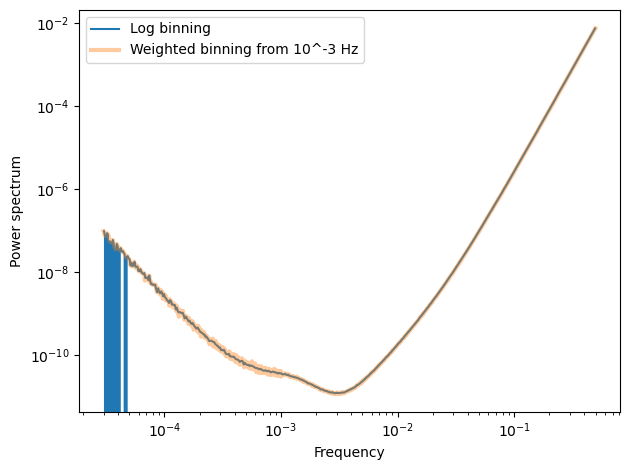

In [7]:
plt.figure()

row = 0
plt.plot(freq, signal[row], label='Log binning')
plt.plot(freqb, signalb[row], lw = 3, alpha = 0.4, label='Weighted binning from 10^-3 Hz')

plt.xscale("log")  
plt.yscale("log")  
plt.xlabel("Frequency")
plt.ylabel("Power spectrum")
plt.legend()
plt.tight_layout()

plt.show()

In [8]:
pcols = ["p1", "p2", "p3", "p4", "p5"] # This corresponds to Tx, alpha, betaH, gx, vw
# This example is for a fixed spectrum, but if you generate enough samples you should recover the min/max values that you set for each parameter
p = df[pcols].apply(pd.to_numeric)

mins = p.min()
maxs = p.max()

print(pd.DataFrame({"min": mins, "max": maxs})) 

      min    max
p1  150.0  150.0
p2    0.4    0.4
p3  100.0  100.0
p4  110.0  110.0
p5    0.9    0.9
